# Simulating effective resistanace using NPL setup
<img src="./support-files/cqps-resistance.svg"/>

<IPython.core.display.Javascript object>


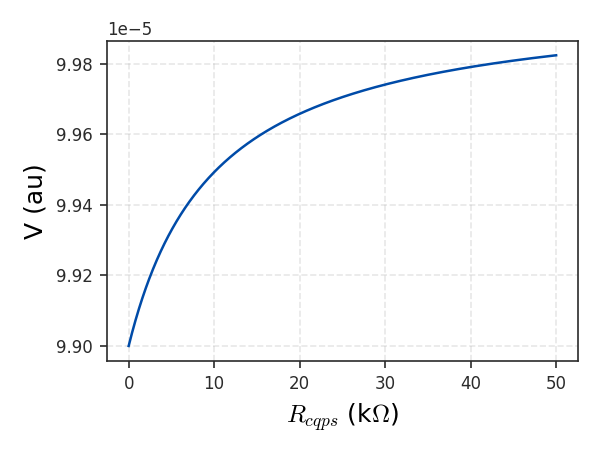

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("support-files/qubit.mplstyle")
import ipywidgets

MOhm = 10**6
kOhm = 10**3

R1 = 1*MOhm
R2 = 100
R_meander = 5*kOhm
R_cqps = np.linspace(0, 50*kOhm, 1001)

def eval_voltage_on_cqps(R1: float, R2: float, R_meander: float):
    R_of_branch =  R2 * (2 * R_meander + R_cqps) / (R2 + 2 * R_meander + R_cqps)    
    V_on_branch = R / (R1 + R)
    V_on_cqps = V_on_branch * R_cqps /
    return V

fig, ax = plt.subplots(1, 1, figsize=(4,3))
simulation_graph, = ax.plot(R_cqps/kOhm, eval_voltage_on_cqps(R1, R2, R_meander))
ax.set_xlabel("$R_{cqps}$ (k$\Omega$)", fontsize=12)
ax.set_ylabel("V (au)", fontsize=12)
plt.tight_layout()

In [10]:
def update(R1: float, R2: float, R_meander: float):
    R1 = R1*MOhm
    R_meander = R_meander*kOhm
    simulation_graph.set_ydata(eval_voltage_on_cqps(R1, R2, R_meander))
    ax.relim()
    ax.autoscale_view()
    plt.tight_layout()
    
R1_widget = ipywidgets.FloatSlider(
    min=0, max=10, step=0.1,
    description="$R_1 (M\Omega)$", value=R1/MOhm,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=True
)
R2_widget = ipywidgets.FloatSlider(
    min=0, max=1000, step=1,
    description="$R_2 (\Omega)$", value=R2,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=True
)
R_meander_widget = ipywidgets.FloatSlider(
    min=0, max=10, step=0.1,
    description="$R_{meander} (k\Omega)$", value=R_meander/kOhm,
    layout=ipywidgets.Layout(width='90%'),
    continuous_update=True
)

ui = ipywidgets.GridspecLayout(3, 1)
ui[0,0] = R1_widget
ui[1,0] = R2_widget
ui[2,0] = R_meander_widget

out = ipywidgets.interactive_output(
    update,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "R1": R1_widget,
        "R2": R2_widget,
        "R_meander": R_meander_widget
    }
)  

display(ui, out)

GridspecLayout(children=(FloatSlider(value=1.0, description='$R_1 (M\\Omega)$', layout=Layout(grid_area='widge…

Output()

# Plotting I-V
- V is applied
- For different values of V, $R_{cqps}$ is different

<IPython.core.display.Javascript object>


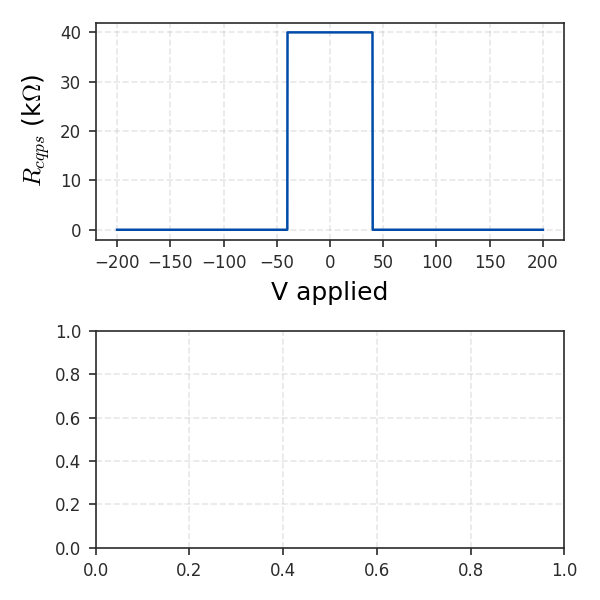

In [15]:
uV = 10**(-6)
R_sections = [
    (-40*uV, 0),
    (40*uV, 40*kOhm),
    (201*uV, 0)
]

V_applied = np.linspace(-200*uV, 200*uV, 4001)
R_cqps = []
for v in V_applied:
    for (v_lim ,r) in R_sections:
        if v < v_lim:
            R_cqps.append(r)
            break
R_cqps = np.array(R_cqps)
            
fig, ax = plt.subplots(2, 1, figsize=(4,4))
ax[0].plot(V_applied/uV, R_cqps/kOhm)

ax[0].set_ylabel("$R_{cqps}$ (k$\Omega$)", fontsize=12)
ax[0].set_xlabel("V applied", fontsize=12)
plt.tight_layout()